In [ ]:
%matplotlib inline
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info.operators import *
import numpy as np

from qiskit.tools.visualization import plot_histogram

from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram


## Z Error

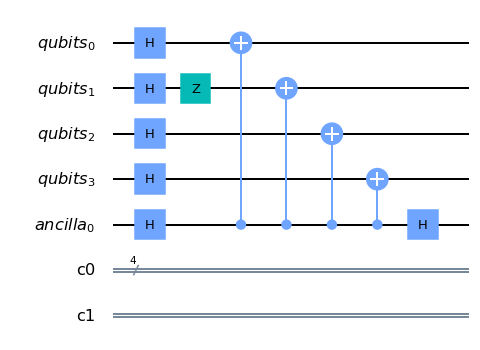

In [2]:
qr = QuantumRegister(4,"qubits")
cr = ClassicalRegister(4)

qr2 = QuantumRegister(1,"ancilla")
cr2 = ClassicalRegister(1)

qc = QuantumCircuit(qr,cr)
qc2 = QuantumCircuit(qr2,cr2)

qc = qc + qc2

qc.h(qr)
qc.h(qr2)
qc.z(1)
qc.cx(4,0)
qc.cx(4,1)
qc.cx(4,2)
qc.cx(4,3)
qc.h(4)
#qc.measure(qr2[0],cr2[0])

qc.draw()

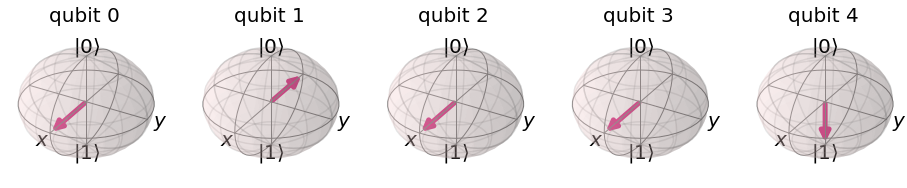

In [3]:
statevector_backend = Aer.get_backend('statevector_simulator')

final_state = execute(qc,statevector_backend).result().get_statevector()

plot_bloch_multivector(final_state)
# array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)

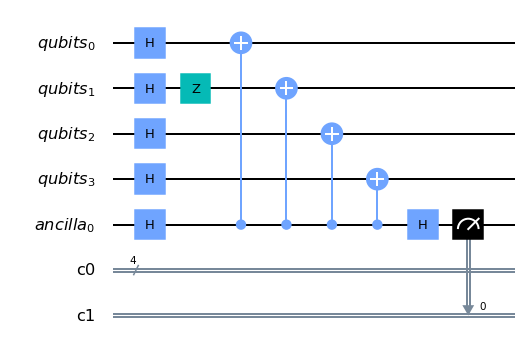

In [4]:
#qc.measure(qr,cr)
qc.measure(qr2,cr2)

qc.draw()

{'1 0000': 1000}


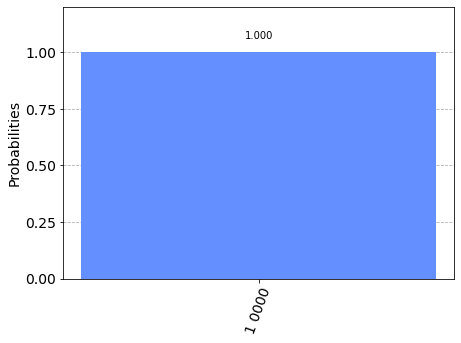

In [5]:


sim = Aer.get_backend("qasm_simulator")
job = execute(qc,sim,shots=1000)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)


## X Error

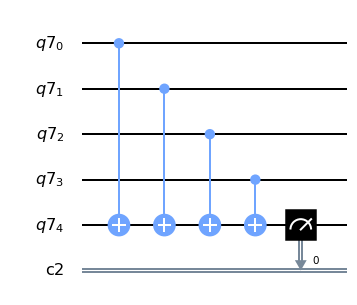

In [6]:
qr3 = QuantumRegister(5)
cr3 = ClassicalRegister(1)

qc3 = QuantumCircuit(qr3,cr3)

qc3.cx(0,4)
qc3.cx(1,4)
qc3.cx(2,4)
qc3.cx(3,4)

qc3.measure(qr3[4],cr3[0])

qc3.draw()

{'0': 1000}


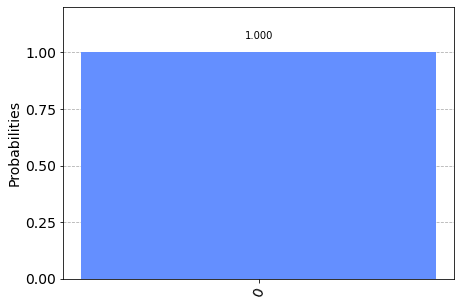

In [7]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc3,sim,shots=1000)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

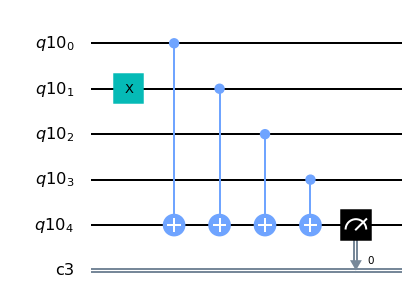

In [8]:
qr3 = QuantumRegister(5)
cr3 = ClassicalRegister(1)

qc3 = QuantumCircuit(qr3,cr3)

qc3.x(1)
qc3.cx(0,4)
qc3.cx(1,4)
qc3.cx(2,4)
qc3.cx(3,4)

qc3.measure(qr3[4],cr3[0])

qc3.draw()


{'1': 1000}


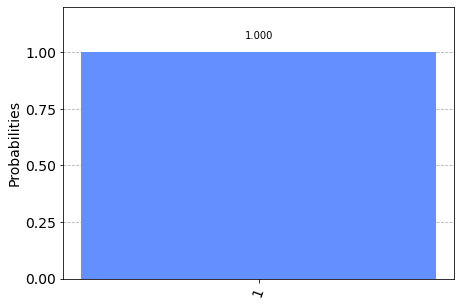

In [9]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc3,sim,shots=1000)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

In [10]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [11]:
noise_model = get_noise(0.01,0.01)  # measure error and gate error 1E-2

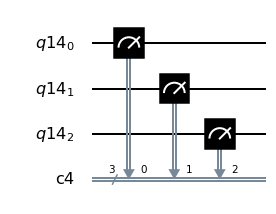

In [12]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

qc0 = QuantumCircuit(qr,cr,name='0') 

qc0.measure(qr,cr) 

qc0.draw()

{'000': 995, '001': 7, '010': 12, '011': 1, '100': 8, '101': 1}


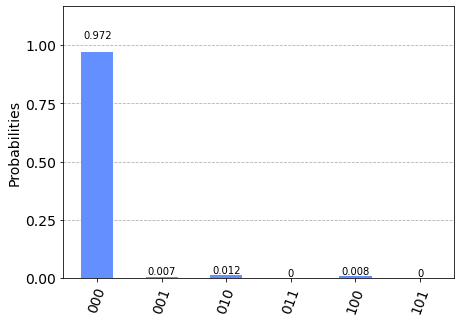

In [13]:
job = execute( qc0, Aer.get_backend('qasm_simulator'),noise_model=noise_model)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

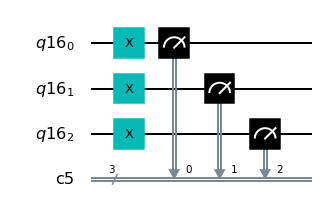

In [14]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

qc0 = QuantumCircuit(qr,cr,name='0') 
qc0.x(qr)
qc0.measure(qr,cr) 

qc0.draw()

{'011': 9, '101': 17, '110': 10, '111': 964}


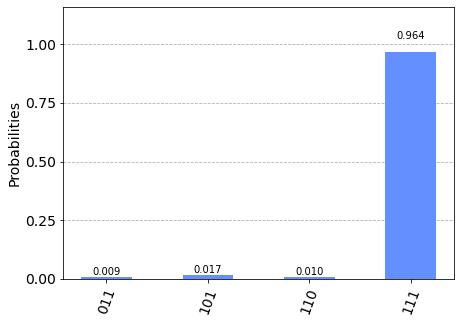

In [15]:
job = execute( qc0, Aer.get_backend('qasm_simulator'),noise_model=noise_model,shots=1000)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

In [16]:
noise_model = get_noise(0.5,0.0) # measure error 5E-1 and gate error 0

{'000': 119, '001': 141, '010': 106, '011': 123, '100': 137, '101': 119, '110': 130, '111': 125}


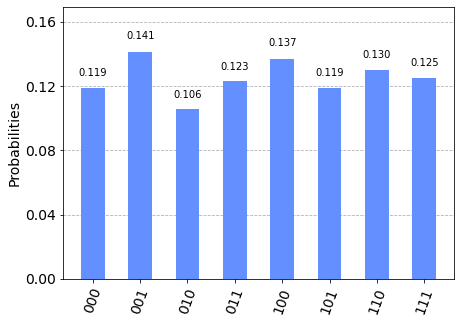

In [17]:
job = execute( qc0, Aer.get_backend('qasm_simulator'),noise_model=noise_model,shots=1000)

histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

## Preserving superposition

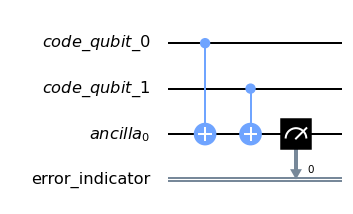

In [18]:
cq = QuantumRegister(2,'code_qubit')
lq = QuantumRegister(1,'ancilla')
sb = ClassicalRegister(1,'error_indicator')
qc = QuantumCircuit(cq,lq,sb)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.measure(lq,sb)
qc.draw()

{'0': 1024}


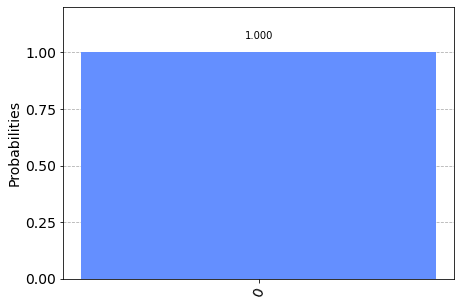

In [19]:
job = execute(qc, Aer.get_backend('qasm_simulator'))
histogram = job.result().get_counts()
print(histogram)
plot_histogram(histogram)

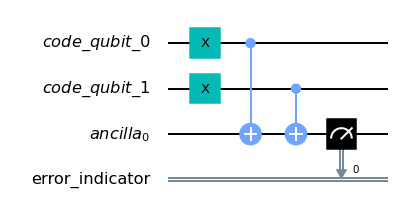

In [20]:
init = QuantumCircuit(cq)
init.x(cq)
(init+qc).draw()

In [21]:
job = execute(init+qc, Aer.get_backend('qasm_simulator'))
histogram = job.result().get_counts()
print ("error indicator: ")
print (histogram)

error indicator: 
{'0': 1024}


In [ ]:
init = QuantumCircuit(cq)

init.h(cq[0])
init.cx(cq[0],cq[1])
(init+qc).draw()

In [ ]:
job = execute(init+qc, Aer.get_backend('qasm_simulator'))
histogram = job.result().get_counts()
print ("error indicator: ")
print (histogram)

In [ ]:
init = QuantumCircuit(cq)
init.h(cq[0])
init.cx(cq[0],cq[1])
init.x(cq[0])

(init+qc).draw()

In [ ]:
job = execute(init+qc, Aer.get_backend('qasm_simulator'))
histogram = job.result().get_counts()
print ("error indicator: ")
print (histogram)